In [1]:
#from bs4 import BeautifulSoup
#import requests
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict
#from IPython.core.display import display, HTML
import pickle
import copy


## Retrieve scraped data via pickle

In [ ]:
#director = 'godard'
#director = 'hitchcock'
#director = 'bergman'
#director = 'fassbinder'
#director = 'herzog'
#director = 'allen'
director='scorsese'

In [2]:

dir_str = director + '/'

pickled_film_catalog_filename = 'film_catalog_' + director +'.pickle'
pickled_box_office_filename = 'box_office_' + director +'.pickle'
pickled_fc_columns_filename = 'fc_cols_' + director +'.pickle'
pickled_dict_of_actors_filename = 'dict_of_actors_' + director +'.pickle'

#pickled_misc_vars_filename = 'misc_vars_' + director +'.pickle'

In [3]:
with open(dir_str + pickled_film_catalog_filename, 'rb') as read_file:
    film_catalog_cast_columns_reordered = pickle.load(read_file)

In [4]:
with open(dir_str + pickled_box_office_filename, 'rb') as read_file:
    box_office_df = pickle.load(read_file)

In [5]:
with open(dir_str + pickled_fc_columns_filename, 'rb') as read_file:
    film_catalog_columns = pickle.load(read_file)


In [6]:
with open(dir_str + pickled_dict_of_actors_filename, 'rb') as read_file:
    dict_of_all_actors  = pickle.load(read_file) 

In [7]:
first_cast_column = len(film_catalog_columns) - len(dict_of_all_actors)

### Merging, cleaning, wrangling

In [8]:
if(director != 'fassbinder'):
    films_df = pd.merge(film_catalog_cast_columns_reordered, box_office_df, how='outer', left_on='title', right_on='title')
else:
    films_df = film_catalog_cast_columns_reordered
    films_df['worldwide_gross_bo'] = np.nan

In [9]:
films_df.head(10)

,title,year,rating,rating_count,duration,release_date,metacritic_score,worldwide_gross_imdb,runtime,budget,...,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica,worldwide_gross_bo
0,Roosevelt,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Devil in the White City,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Killers of the Flower Moon,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,200000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Untitled David Johansen/NY Dolls Documentary,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,An Afternoon with SCTV,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pretend It's a City,NaN,8.3,1913.0,203.0,8 January 2021 (USA),NaN,NaN,203.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,The Irishman: In Conversation,2019.0,7.4,1579.0,23.0,27 November 2019 (USA),NaN,NaN,23.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,The Irishman,2019.0,7.9,322963.0,209.0,27 November 2019 (USA),94.0,968853.0,209.0,159000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,910234.0
8,Rolling Thunder Revue: A Bob Dylan Story by Ma...,2019.0,7.6,5300.0,142.0,12 June 2019 (USA),86.0,NaN,142.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Silence,2016.0,7.2,100119.0,161.0,13 January 2017 (USA),79.0,23834809.0,161.0,46000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23726626.0


In [10]:
films_df.columns[:]


Index(['title', 'year', 'rating', 'rating_count', 'duration', 'release_date',
       'metacritic_score', 'worldwide_gross_imdb', 'runtime', 'budget',
       ...
       'Rosamond Bernier', 'John Burgee', 'Dina Chandel', 'Eleanor Clark',
       'Bette Davis', 'Geraldine Fitzgerald', 'Greer Garson', 'Joan Givner',
       'Fred Sica', 'worldwide_gross_bo'],
      dtype='object', length=2802)

In [11]:
films_df.head()

,title,year,rating,rating_count,duration,release_date,metacritic_score,worldwide_gross_imdb,runtime,budget,...,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica,worldwide_gross_bo
0,Roosevelt,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Devil in the White City,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Killers of the Flower Moon,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,200000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Untitled David Johansen/NY Dolls Documentary,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,An Afternoon with SCTV,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# these renamings are temporary
if('box_office' in films_df.columns):
    films_df.rename(columns={'box_office':'worldwide_gross_bo'}, inplace=True)
    films_df

In [13]:
# these renamings are temporary
if('worldwide_gross' in films_df.columns):
    films_df.rename(columns={'worldwide_gross':'worldwide_gross_imdb'}, inplace=True)

In [14]:
main_column_names_rearranged = ['title', 'year', 'release_date', 'duration', 'runtime', 'budget', 'worldwide_gross_imdb', 'worldwide_gross_bo', 'rating', 'metacritic_score', 'rating_count', 'tv_series', 'documentary','cinematographer']
cast_column_names= films_df.columns[first_cast_column:-1]

In [15]:
films_df.columns[:15]

Index(['title', 'year', 'rating', 'rating_count', 'duration', 'release_date',
       'metacritic_score', 'worldwide_gross_imdb', 'runtime', 'budget',
       'tv_series', 'documentary', 'cinematographer', 'Robert De Niro',
       'Martin Scorsese'],
      dtype='object')

In [16]:
#import copy


films_df_reordered=copy.deepcopy(films_df[[*main_column_names_rearranged, *cast_column_names] ] )                         
                            

In [17]:
films_df_reordered.head(10)

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,A. Scott Berg,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica
0,Roosevelt,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Devil in the White City,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Killers of the Flower Moon,NaN,,NaN,NaN,200000000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Untitled David Johansen/NY Dolls Documentary,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,An Afternoon with SCTV,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pretend It's a City,NaN,8 January 2021 (USA),203.0,203.0,NaN,NaN,NaN,8.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,The Irishman: In Conversation,2019.0,27 November 2019 (USA),23.0,23.0,NaN,NaN,NaN,7.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,The Irishman,2019.0,27 November 2019 (USA),209.0,209.0,159000000.0,968853.0,910234.0,7.9,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Rolling Thunder Revue: A Bob Dylan Story by Ma...,2019.0,12 June 2019 (USA),142.0,142.0,NaN,NaN,NaN,7.6,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Silence,2016.0,13 January 2017 (USA),161.0,161.0,46000000.0,23834809.0,23726626.0,7.2,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
films_df_reordered.shape

(92, 2802)

#### Clean up the `year` column

In [19]:
films_df_reordered['release_date'].fillna('', inplace=True)

In [20]:
films_df_reordered

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,A. Scott Berg,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica
0,Roosevelt,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Devil in the White City,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Killers of the Flower Moon,NaN,,NaN,NaN,200000000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Untitled David Johansen/NY Dolls Documentary,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,An Afternoon with SCTV,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Surviving Progress,NaN,,NaN,NaN,NaN,NaN,53953.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,The Young Victoria,NaN,,NaN,NaN,NaN,NaN,31878891.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Bringing Out The Dead,NaN,,NaN,NaN,NaN,NaN,16640210.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Clockers,NaN,,NaN,NaN,NaN,NaN,12993765.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
flix_to_clean_yr = (np.isnan(films_df_reordered['year'])) & (films_df_reordered['release_date']!='') & (films_df_reordered['release_date']!= 'NaN')

In [22]:
#films_df_reordered.loc[films_df_reordered[flix_to_clean_yr ], 'years'] = films_df_reordered.loc[films_df_reordered[flix_to_clean_yr ], 'years']

In [23]:
# use the release_date column where possible to set missing values in the year column
#films_df_reordered['year']=films_df_reordered.apply(lambda row: float((re.search(r'\d{4}', row['release_date'])).group()) if (np.isnan(row['year']) & (row['release_date']!='') & (row['release_date']!='NaN') ) else row['year'], axis=1)

cleaned_yrs = films_df_reordered.apply(lambda row: float((re.search(r'\d{4}', row['release_date'])).group()) if (np.isnan(row['year']) & (row['release_date']!='') & (row['release_date']!='NaN') ) else row['year'], axis=1)
films_df_reordered.loc[:, 'year'] = cleaned_yrs


In [24]:
films_df_reordered.tail(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,A. Scott Berg,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica
42,Made in Milan,1990.0,,20.0,20.0,NaN,NaN,NaN,6.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Goodfellas,1990.0,21 September 1990 (USA),146.0,146.0,25000000.0,46952991.0,47092936.0,8.7,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,New York Stories,1989.0,10 March 1989 (USA),124.0,124.0,15000000.0,10763469.0,10763469.0,6.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Location Production Footage: The Last Temptati...,1988.0,,15.0,15.0,NaN,NaN,NaN,6.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,The Last Temptation of Christ,1988.0,12 August 1988 (Canada),164.0,164.0,7000000.0,8865702.0,8373585.0,7.5,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Michael Jackson: Bad,1987.0,31 August 1987 (USA),18.0,18.0,2000000.0,NaN,NaN,7.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,The Color of Money,1986.0,17 October 1986 (USA),119.0,119.0,13800000.0,52293982.0,52293000.0,7.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Amazing Stories,1985.0,29 September 1985 (USA),30.0,30.0,NaN,NaN,NaN,7.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,After Hours,1985.0,11 October 1985 (USA),97.0,97.0,4500000.0,10609321.0,10609321.0,7.7,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,The King of Comedy,1982.0,18 February 1983 (Brazil),109.0,109.0,20000000.0,2536242.0,2536242.0,7.8,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Clean up the `duration` column

In [25]:
films_df_reordered['duration']=films_df_reordered.apply(lambda row: row['runtime'] if (np.isnan(row['duration']) ) else row['duration'], axis=1)

#### Clean up the `bo_worldwide_gross` column

In [26]:
films_df_reordered['worldwide_gross'] = films_df_reordered.apply(lambda row: float(row['worldwide_gross_bo']) if (pd.notna(row['worldwide_gross_bo'])) & (row['worldwide_gross_bo']!='' ) else row['worldwide_gross_imdb'], axis=1)

In [27]:
films_df_reordered.head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica,worldwide_gross
0,Roosevelt,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Devil in the White City,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Killers of the Flower Moon,NaN,,NaN,NaN,200000000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Untitled David Johansen/NY Dolls Documentary,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,An Afternoon with SCTV,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pretend It's a City,2021.0,8 January 2021 (USA),203.0,203.0,NaN,NaN,NaN,8.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,The Irishman: In Conversation,2019.0,27 November 2019 (USA),23.0,23.0,NaN,NaN,NaN,7.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,The Irishman,2019.0,27 November 2019 (USA),209.0,209.0,159000000.0,968853.0,910234.0,7.9,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,910234.0
8,Rolling Thunder Revue: A Bob Dylan Story by Ma...,2019.0,12 June 2019 (USA),142.0,142.0,NaN,NaN,NaN,7.6,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Silence,2016.0,13 January 2017 (USA),161.0,161.0,46000000.0,23834809.0,23726626.0,7.2,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23726626.0


In [28]:
films_df_reordered.columns[350:710]

Index(['Buck Henry', 'Valerie Jarrett', 'Billie Jean King', 'Larry King',
       'Lornie Kuhle', 'Caroline Wozniacki', 'Randy Moffitt', 'Nancy Richey',
       'Larry Riggs', 'Philip Roth',
       ...
       'Geraldine Guo', 'Justin Hagan', 'Sophie Hayden', 'James Henke',
       'Sonya Hensley', 'Robin Wiley', 'Jann Wenner', 'Patrick Wayne',
       'Katie Couric', 'Chip Cronkite'],
      dtype='object', length=360)

#### Remove rows with too many missing values

In [29]:
films_df_reordered.shape

(92, 2803)

In [30]:

n=films_df_reordered.iloc[:, :first_cast_column].notna()
n.sum(axis=1).head(50)


0      4
1      4
2      5
3      4
4      4
5      9
6      9
7     13
8     10
9     13
10    10
11    10
12    11
13     9
14    13
15    13
16    10
17     9
18    11
19     9
20     7
21    13
22    12
23     9
24    13
25     9
26    13
27     9
28     9
29     7
30    13
31     7
32     9
33    12
34    11
35    13
36     8
37     7
38    13
39    13
40     9
41    13
42     9
43    13
44    12
45     9
46    13
47    10
48    13
49     9
dtype: int64

In [31]:
first_cast_column

13

In [32]:
thresh=.4
thresh*first_cast_column

5.2

In [33]:
films_df_reordered.loc[n.sum(axis=1) >= thresh*first_cast_column]

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica,worldwide_gross
5,Pretend It's a City,2021.0,8 January 2021 (USA),203.0,203.0,NaN,NaN,NaN,8.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,The Irishman: In Conversation,2019.0,27 November 2019 (USA),23.0,23.0,NaN,NaN,NaN,7.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,The Irishman,2019.0,27 November 2019 (USA),209.0,209.0,159000000.0,968853.0,910234.0,7.9,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,910234.0
8,Rolling Thunder Revue: A Bob Dylan Story by Ma...,2019.0,12 June 2019 (USA),142.0,142.0,NaN,NaN,NaN,7.6,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Silence,2016.0,13 January 2017 (USA),161.0,161.0,46000000.0,23834809.0,23726626.0,7.2,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23726626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,I Call First,1967.0,13 September 1968 (USA),90.0,90.0,75000.0,16085.0,NaN,6.6,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16085.0
65,New York City... Melting Point,1966.0,,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,"It's Not Just You, Murray!",1964.0,February 1964 (USA),15.0,15.0,NaN,NaN,NaN,6.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,What's a Nice Girl Like You Doing in a Place L...,1963.0,1963 (USA),9.0,9.0,NaN,NaN,NaN,6.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [34]:
#films_df_reordered.iloc[70, :].head(30)

In [35]:
films_df_reordered.columns

Index(['title', 'year', 'release_date', 'duration', 'runtime', 'budget',
       'worldwide_gross_imdb', 'worldwide_gross_bo', 'rating',
       'metacritic_score',
       ...
       'Rosamond Bernier', 'John Burgee', 'Dina Chandel', 'Eleanor Clark',
       'Bette Davis', 'Geraldine Fitzgerald', 'Greer Garson', 'Joan Givner',
       'Fred Sica', 'worldwide_gross'],
      dtype='object', length=2803)

In [36]:


films_df_reordered = films_df_reordered.loc[n.sum(axis=1) >= thresh*first_cast_column, :] 

In [37]:
films_df_reordered.shape

(64, 2803)

#### Cleap up the ordering of columns

In [38]:
main_column_names_rearranged = ['title', 'year', 'release_date', 'duration', 'runtime', 'budget', 'worldwide_gross','worldwide_gross_imdb', 'worldwide_gross_bo', 'rating', 'metacritic_score', 'rating_count', 'tv_series', 'documentary','cinematographer']
cast_column_names= films_df.columns[first_cast_column:-1]

In [39]:
films_df_reordered=films_df_reordered[[*main_column_names_rearranged, *cast_column_names] ] 

In [40]:
films_df_reordered.columns[:20]

Index(['title', 'year', 'release_date', 'duration', 'runtime', 'budget',
       'worldwide_gross', 'worldwide_gross_imdb', 'worldwide_gross_bo',
       'rating', 'metacritic_score', 'rating_count', 'tv_series',
       'documentary', 'cinematographer', 'Robert De Niro', 'Martin Scorsese',
       'Leonardo DiCaprio', 'Harvey Keitel', 'Joe Pesci'],
      dtype='object')

In [41]:
films_df_reordered.columns[20:85]

Index(['Catherine Scorsese', 'Eric Clapton', 'Harry Northup', 'Victor Argo',
       'Michael Stuhlbarg', 'Charles Scorsese', 'Barry Primus', 'Ringo Starr',
       'Dr. John', 'Michael Jackson', 'Frank Vincent', 'Bob Dylan',
       'Paul Herman', 'Robert Uricola', 'Murray Moston', 'Stephen Graham',
       'Verna Bloom', 'Clint Eastwood', 'Alec Baldwin', 'Gregory Peck',
       'Ray Romano', 'Diahnne Abbott', 'Barbara Hershey', 'Patricia Clarkson',
       'Ray Winstone', 'Christopher Lee', 'Dave Brubeck', 'Woody Allen',
       'Carl Lumbly', 'Paul McCartney', 'Ray Charles', 'Jude Law', 'Jeff Beck',
       'Emily Mortimer', 'Liza Minnelli', 'Joni Mitchell', 'Jerry Lewis',
       'Gavin Lambert', 'Gore Vidal', 'Richard Easton', 'James Baldwin',
       'Lou Brown', 'Ed Herlihy', 'Chuck Low', 'Ben Kingsley',
       'George Memmoli', 'Tony Lo Bianco', 'Rob Reiner', 'Lionel Stander',
       'Sheryl Crow', 'Francis Ford Coppola', 'Mary Kay Place', 'Cheech Marin',
       'William F. Buckley', 'Ch

In [42]:
films_df_reordered.sort_values(by='title').tail(40)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,A. Scott Berg,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica
59,Mean Streets,1973.0,14 October 1973 (USA),112.0,112.0,500000.0,32645.0,41131.0,32645.0,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Michael Jackson: Bad,1987.0,31 August 1987 (USA),18.0,18.0,2000000.0,NaN,NaN,NaN,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Michael Jackson: Number Ones,2003.0,18 November 2003 (USA),91.0,91.0,NaN,NaN,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Michael Jackson: Video Greatest Hits - HIStory,1995.0,16 June 1995 (Spain),89.0,NaN,NaN,NaN,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,My Voyage to Italy,1999.0,16 May 2002 (France),246.0,246.0,NaN,11683.0,11683.0,NaN,8.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,New York City... Melting Point,1966.0,,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,New York Stories,1989.0,10 March 1989 (USA),124.0,124.0,15000000.0,10763469.0,10763469.0,10763469.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,"New York, New York",1977.0,21 June 1977 (USA),155.0,155.0,14000000.0,13800000.0,16400000.0,13800000.0,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pretend It's a City,2021.0,8 January 2021 (USA),203.0,203.0,NaN,NaN,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Public Speaking,2010.0,22 November 2010 (USA),84.0,84.0,NaN,43184.0,62173.0,43184.0,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### In cast columns, replace NaN with zero

In [43]:
#first_cast_column = len(films_df_reordered.columns[15:])

In [44]:
#first_cast_column = len(films_df_reordered.columns) - len(dict_of_all_actors)

In [45]:
films_df_reordered.head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,A. Scott Berg,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica
5,Pretend It's a City,2021.0,8 January 2021 (USA),203.0,203.0,NaN,NaN,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,The Irishman: In Conversation,2019.0,27 November 2019 (USA),23.0,23.0,NaN,NaN,NaN,NaN,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,The Irishman,2019.0,27 November 2019 (USA),209.0,209.0,159000000.0,910234.0,968853.0,910234.0,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Rolling Thunder Revue: A Bob Dylan Story by Ma...,2019.0,12 June 2019 (USA),142.0,142.0,NaN,NaN,NaN,NaN,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Silence,2016.0,13 January 2017 (USA),161.0,161.0,46000000.0,23726626.0,23834809.0,23726626.0,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Vinyl,2016.0,14 February 2016 (USA),60.0,60.0,100000000.0,NaN,NaN,NaN,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,The Audition,2015.0,27 October 2015 (China),16.0,16.0,70000000.0,NaN,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,The 50 Year Argument,2014.0,29 January 2015 (Denmark),97.0,97.0,NaN,361.0,361.0,,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,The King of Comedy: Deleted and Extended Scenes,2014.0,25 March 2014 (USA),38.0,38.0,NaN,NaN,NaN,NaN,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,The Wolf of Wall Street,2013.0,25 December 2013 (USA),180.0,180.0,100000000.0,389918903.0,392000694.0,389918903.0,8.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
films_df_reordered.iloc[:, first_cast_column:]=films_df_reordered.iloc[:, first_cast_column:].replace(np.nan, 0)

In [47]:
films_df_reordered.iloc[:, first_cast_column:].sum()

documentary                                                          23.0
cinematographer         Ellen KurasRodrigo PrietoHoward AlkRodrigo Pri...
Robert De Niro                                                       13.0
Martin Scorsese                                                      10.0
Leonardo DiCaprio                                                     6.0
                                              ...                        
Bette Davis                                                           1.0
Geraldine Fitzgerald                                                  1.0
Greer Garson                                                          1.0
Joan Givner                                                           1.0
Fred Sica                                                             1.0
Length: 2790, dtype: object

In [48]:
films_df_reordered.head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,A. Scott Berg,Rosamond Bernier,John Burgee,Dina Chandel,Eleanor Clark,Bette Davis,Geraldine Fitzgerald,Greer Garson,Joan Givner,Fred Sica
5,Pretend It's a City,2021.0,8 January 2021 (USA),203.0,203.0,NaN,NaN,NaN,NaN,8.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,The Irishman: In Conversation,2019.0,27 November 2019 (USA),23.0,23.0,NaN,NaN,NaN,NaN,7.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,The Irishman,2019.0,27 November 2019 (USA),209.0,209.0,159000000.0,910234.0,968853.0,910234.0,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Rolling Thunder Revue: A Bob Dylan Story by Ma...,2019.0,12 June 2019 (USA),142.0,142.0,NaN,NaN,NaN,NaN,7.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Silence,2016.0,13 January 2017 (USA),161.0,161.0,46000000.0,23726626.0,23834809.0,23726626.0,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Vinyl,2016.0,14 February 2016 (USA),60.0,60.0,100000000.0,NaN,NaN,NaN,7.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,The Audition,2015.0,27 October 2015 (China),16.0,16.0,70000000.0,NaN,NaN,NaN,6.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,The 50 Year Argument,2014.0,29 January 2015 (Denmark),97.0,97.0,NaN,361.0,361.0,,6.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,The King of Comedy: Deleted and Extended Scenes,2014.0,25 March 2014 (USA),38.0,38.0,NaN,NaN,NaN,NaN,6.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,The Wolf of Wall Street,2013.0,25 December 2013 (USA),180.0,180.0,100000000.0,389918903.0,392000694.0,389918903.0,8.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
films_df_reordered.dtypes[:15]

title                    object
year                    float64
release_date             object
duration                float64
runtime                 float64
budget                  float64
worldwide_gross         float64
worldwide_gross_imdb    float64
worldwide_gross_bo       object
rating                  float64
metacritic_score        float64
rating_count            float64
tv_series               float64
documentary             float64
cinematographer          object
dtype: object

In [50]:
films_df_reordered.iloc[:, :first_cast_column].head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,rating_count,tv_series
5,Pretend It's a City,2021.0,8 January 2021 (USA),203.0,203.0,NaN,NaN,NaN,NaN,8.3,NaN,1913.0,1.0
6,The Irishman: In Conversation,2019.0,27 November 2019 (USA),23.0,23.0,NaN,NaN,NaN,NaN,7.4,NaN,1579.0,0.0
7,The Irishman,2019.0,27 November 2019 (USA),209.0,209.0,159000000.0,910234.0,968853.0,910234.0,7.9,94.0,322963.0,0.0
8,Rolling Thunder Revue: A Bob Dylan Story by Ma...,2019.0,12 June 2019 (USA),142.0,142.0,NaN,NaN,NaN,NaN,7.6,86.0,5300.0,0.0
9,Silence,2016.0,13 January 2017 (USA),161.0,161.0,46000000.0,23726626.0,23834809.0,23726626.0,7.2,79.0,100119.0,0.0
10,Vinyl,2016.0,14 February 2016 (USA),60.0,60.0,100000000.0,NaN,NaN,NaN,7.8,NaN,21636.0,1.0
11,The Audition,2015.0,27 October 2015 (China),16.0,16.0,70000000.0,NaN,NaN,NaN,6.6,NaN,2950.0,0.0
12,The 50 Year Argument,2014.0,29 January 2015 (Denmark),97.0,97.0,NaN,361.0,361.0,,6.4,NaN,611.0,0.0
13,The King of Comedy: Deleted and Extended Scenes,2014.0,25 March 2014 (USA),38.0,38.0,NaN,NaN,NaN,NaN,6.4,NaN,110.0,0.0
14,The Wolf of Wall Street,2013.0,25 December 2013 (USA),180.0,180.0,100000000.0,389918903.0,392000694.0,389918903.0,8.2,75.0,1182444.0,0.0


In [51]:
films_df_reordered["worldwide_gross"] = pd.to_numeric(films_df_reordered["worldwide_gross"])

In [52]:
films_df_reordered.iloc[:,:first_cast_column].corr()

,year,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,rating,metacritic_score,rating_count,tv_series
year,1.000000,0.297887,0.307744,0.816718,0.405374,0.405551,0.224899,0.069366,0.176680,0.206955
duration,0.297887,1.000000,1.000000,0.444192,0.235989,0.240493,0.309442,0.203362,0.334086,0.054180
runtime,0.307744,1.000000,1.000000,0.410367,0.235989,0.240493,0.317174,0.203362,0.327936,0.115254
budget,0.816718,0.444192,0.410367,1.000000,0.607578,0.614519,0.308990,0.058124,0.425256,-0.048745
worldwide_gross,0.405374,0.235989,0.235989,0.607578,1.000000,0.999722,0.364031,-0.219197,0.777771,NaN
worldwide_gross_imdb,0.405551,0.240493,0.240493,0.614519,0.999722,1.000000,0.361873,-0.219408,0.773286,NaN
rating,0.224899,0.309442,0.317174,0.308990,0.364031,0.361873,1.000000,0.525924,0.456953,0.087970
metacritic_score,0.069366,0.203362,0.203362,0.058124,-0.219197,-0.219408,0.525924,1.000000,0.049309,NaN
rating_count,0.176680,0.334086,0.327936,0.425256,0.777771,0.773286,0.456953,0.049309,1.000000,-0.154508
tv_series,0.206955,0.054180,0.115254,-0.048745,NaN,NaN,0.087970,NaN,-0.154508,1.000000


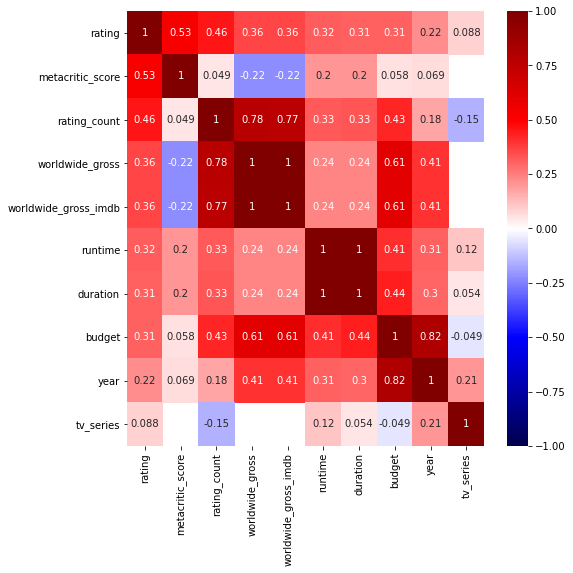

In [53]:
ix = films_df_reordered.iloc[:,:first_cast_column].corr().sort_values('rating', ascending=False).index
films_df_reordered_sorted = films_df_reordered.loc[:, ix]
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(films_df_reordered_sorted.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, ax=ax);

In [54]:
#sns.heatmap(films_df_reordered.iloc[:,:first_cast_column].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

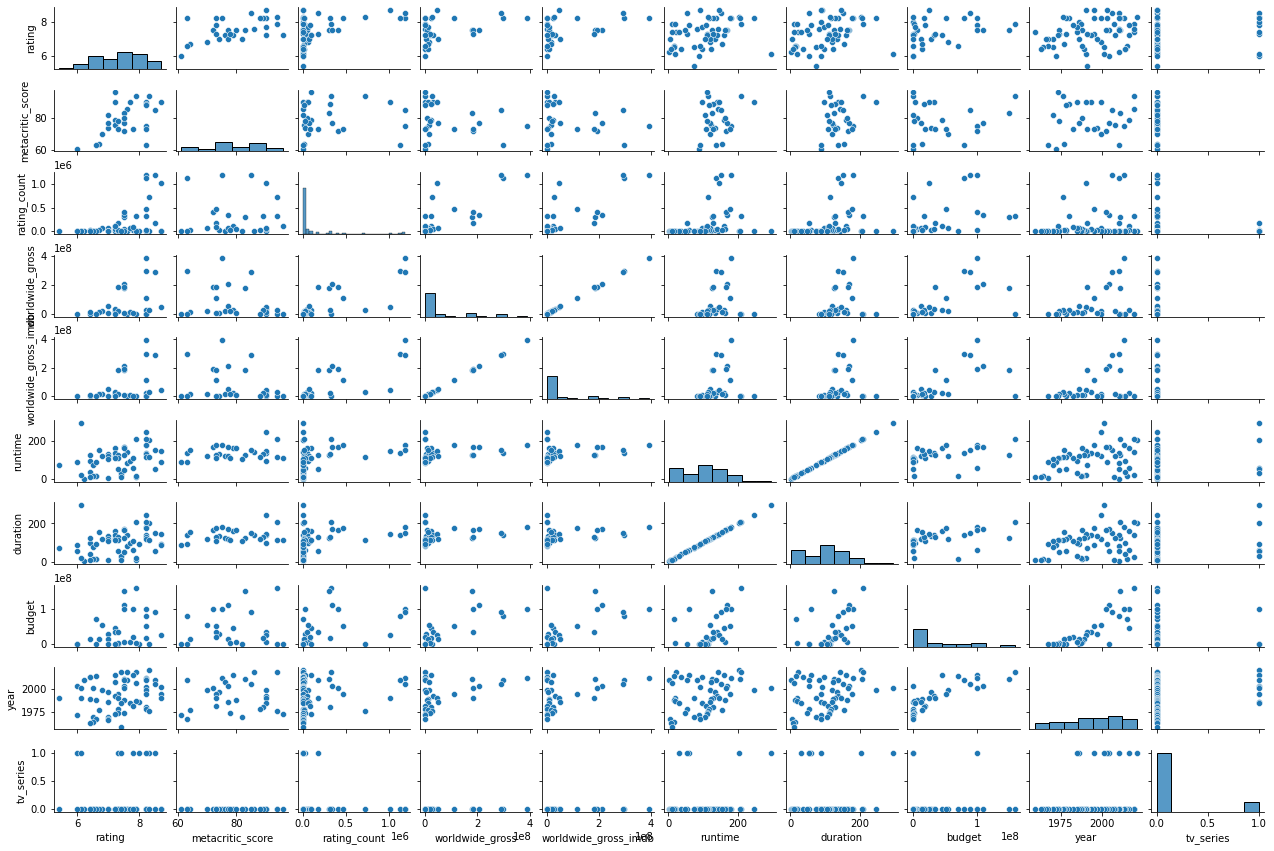

In [55]:
sns.pairplot(films_df_reordered_sorted.iloc[:,:first_cast_column], height=1.2, aspect=1.5);

#### Determine which columns have enough non-null values so they could be used

In [56]:
films_df_reordered['worldwide_gross'].value_counts(dropna=False)

NaN            32
182291969.0     1
16173879.0      1
10763469.0      1
11683.0         1
6443.0          1
110400000.0     1
47092936.0      1
13800000.0      1
389918903.0     1
180047784.0     1
361.0           1
16797191.0      1
10609321.0      1
299461782.0     1
23726626.0      1
289660619.0     1
208370892.0     1
8373585.0       1
910234.0        1
32645.0         1
322563.0        1
2536242.0       1
183124621.0     1
18600000.0      1
32014993.0      1
43184.0         1
156113.0        1
16085.0         1
52293000.0      1
28317378.0      1
23380513.0      1
5686694.0       1
Name: worldwide_gross, dtype: int64

In [57]:
films_to_analyze=films_df_reordered[(films_df_reordered['year'].notnull()) & (films_df_reordered['duration']>30) & (films_df_reordered['rating'].notnull()) & (films_df_reordered['cinematographer']!='') & (films_df_reordered['cinematographer'].notnull())]
films_to_analyze.iloc[:,5:15].head(10)


,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,rating_count,tv_series,documentary,cinematographer
5,NaN,NaN,NaN,NaN,8.3,NaN,1913.0,1.0,1.0,Ellen Kuras
7,159000000.0,910234.0,968853.0,910234.0,7.9,94.0,322963.0,0.0,0.0,Rodrigo Prieto
8,NaN,NaN,NaN,NaN,7.6,86.0,5300.0,0.0,1.0,Howard Alk
9,46000000.0,23726626.0,23834809.0,23726626.0,7.2,79.0,100119.0,0.0,0.0,Rodrigo Prieto
10,100000000.0,NaN,NaN,NaN,7.8,NaN,21636.0,1.0,0.0,Reed Morano
12,NaN,361.0,361.0,,6.4,NaN,611.0,0.0,1.0,Ellen Kuras
13,NaN,NaN,NaN,NaN,6.4,NaN,110.0,0.0,0.0,Fred Schuler
14,100000000.0,389918903.0,392000694.0,389918903.0,8.2,75.0,1182444.0,0.0,0.0,Rodrigo Prieto
15,150000000.0,180047784.0,185770310.0,180047784.0,7.5,83.0,304665.0,0.0,0.0,Robert Richardson
16,NaN,156113.0,156113.0,NaN,8.2,NaN,10599.0,0.0,1.0,Martin Kenzie


In [58]:
first_actor_column = (len(films_to_analyze.columns) - len(dict_of_all_actors))
first_actor_column

15

In [59]:
actor_columns = films_to_analyze.iloc[:, first_actor_column:].columns
actor_columns

Index(['Robert De Niro', 'Martin Scorsese', 'Leonardo DiCaprio',
       'Harvey Keitel', 'Joe Pesci', 'Catherine Scorsese', 'Eric Clapton',
       'Harry Northup', 'Victor Argo', 'Michael Stuhlbarg',
       ...
       'A. Scott Berg', 'Rosamond Bernier', 'John Burgee', 'Dina Chandel',
       'Eleanor Clark', 'Bette Davis', 'Geraldine Fitzgerald', 'Greer Garson',
       'Joan Givner', 'Fred Sica'],
      dtype='object', length=2788)

In [60]:
films_to_analyze[actor_columns].sum()

Robert De Niro          11.0
Martin Scorsese          5.0
Leonardo DiCaprio        5.0
Harvey Keitel            7.0
Joe Pesci                5.0
                        ... 
Bette Davis              1.0
Geraldine Fitzgerald     1.0
Greer Garson             1.0
Joan Givner              1.0
Fred Sica                0.0
Length: 2788, dtype: float64

In [61]:
actors_num_of_appearances = films_to_analyze[actor_columns].sum()
actors_num_of_appearances

Robert De Niro          11.0
Martin Scorsese          5.0
Leonardo DiCaprio        5.0
Harvey Keitel            7.0
Joe Pesci                5.0
                        ... 
Bette Davis              1.0
Geraldine Fitzgerald     1.0
Greer Garson             1.0
Joan Givner              1.0
Fred Sica                0.0
Length: 2788, dtype: float64

In [62]:
appearances_threshold = 3
prevalent_actors_mask = (actors_num_of_appearances >= appearances_threshold)
prevalent_actors_mask

Robert De Niro           True
Martin Scorsese          True
Leonardo DiCaprio        True
Harvey Keitel            True
Joe Pesci                True
                        ...  
Bette Davis             False
Geraldine Fitzgerald    False
Greer Garson            False
Joan Givner             False
Fred Sica               False
Length: 2788, dtype: bool

In [63]:
prevalent_actor_columns = actor_columns[prevalent_actors_mask]
prevalent_actor_columns 

Index(['Robert De Niro', 'Martin Scorsese', 'Leonardo DiCaprio',
       'Harvey Keitel', 'Joe Pesci', 'Catherine Scorsese', 'Eric Clapton',
       'Harry Northup', 'Victor Argo', 'Michael Stuhlbarg', 'Charles Scorsese',
       'Barry Primus', 'Ringo Starr', 'Frank Vincent', 'Bob Dylan',
       'Paul Herman', 'Murray Moston', 'Stephen Graham', 'Verna Bloom',
       'Alec Baldwin', 'Ray Romano', 'Diahnne Abbott', 'Barbara Hershey',
       'Patricia Clarkson'],
      dtype='object')

In [64]:
films_filename = 'films_to_analyze_'+ director 
with open(dir_str + films_filename, 'wb') as to_write:
    pickle.dump(films_to_analyze, to_write)

In [65]:
prevalent_actors_filename = 'prevalent_actors_' + director
with open(dir_str + prevalent_actors_filename, 'wb') as to_write:
    pickle.dump(prevalent_actor_columns, to_write)

In [66]:
films_to_analyze.iloc[:, 4:18].head()

,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,rating_count,tv_series,documentary,cinematographer,Robert De Niro,Martin Scorsese,Leonardo DiCaprio
5,203.0,NaN,NaN,NaN,NaN,8.3,NaN,1913.0,1.0,1.0,Ellen Kuras,0.0,1.0,0.0
7,209.0,159000000.0,910234.0,968853.0,910234.0,7.9,94.0,322963.0,0.0,0.0,Rodrigo Prieto,1.0,0.0,0.0
8,142.0,NaN,NaN,NaN,NaN,7.6,86.0,5300.0,0.0,1.0,Howard Alk,0.0,0.0,0.0
9,161.0,46000000.0,23726626.0,23834809.0,23726626.0,7.2,79.0,100119.0,0.0,0.0,Rodrigo Prieto,0.0,0.0,0.0
10,60.0,100000000.0,NaN,NaN,NaN,7.8,NaN,21636.0,1.0,0.0,Reed Morano,0.0,0.0,0.0


### EDA and Linear Regression continued in `3a_eda_lin_reg_film_director.ipynb`